#### Create model based on cleaned data

#### Note - must run data cleaning and Matlab resampling prior to training

In [295]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import time
from sklearn.preprocessing import MinMaxScaler

import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.preprocessing import StandardScaler
from tensorflow import keras
import h5py

df = pd.read_csv('sensors_2.csv')
df.columns = ['1', '2', '3', '4', 'd1', 'd2', 'd3', 'd4', 'hours', 'minutes', 'seconds']

flow = pd.read_csv('Flow_2.csv')
flow.columns = ['Flow']

df.head()

,1,2,3,4,d1,d2,d3,d4,hours,minutes,seconds
0,0.424000,0.424000,0.440000,0.471111,0.000000,0.000000,0.000000,0.0,15.0,7.0,52.892885
1,0.424000,0.424000,0.444000,0.471111,0.000000,0.000000,0.194518,0.0,15.0,7.0,52.903167
2,0.421333,0.421333,0.442660,0.471111,-0.082280,-0.082280,0.060905,0.0,15.0,7.0,52.913970
3,0.419992,0.419992,0.441990,0.471111,-0.094907,-0.094907,0.016135,0.0,15.0,7.0,52.924747
4,0.419186,0.417572,0.441589,0.471111,-0.091715,-0.130750,-0.000505,0.0,15.0,7.0,52.934627


In [296]:
flow.head()

,Flow
0,23.151503
1,25.379902
2,24.819828
3,25.095027
4,24.990246


In [297]:
def classSwitch(Class):
    """
    Class switch function to filter 3 classifiers down to 2 (inhale and exhale)

    Args:
        Class (list): List of inhale / exhale classes

    Returns:
        decisionClass (list): Filtered (with moving average) of resulting simplified class
    """

    decision = []
    for i in range(0, len(Class)):
        
        if Class[i] == 1:
            decision.append(1)
            
        elif Class[i] == 0:
            decision.append(0)
            
        elif Class[i] == 2:
            if len(decision) > 1:
                decision.append(decision[-1])
            else:
                decision.append(2)
            
    return decision

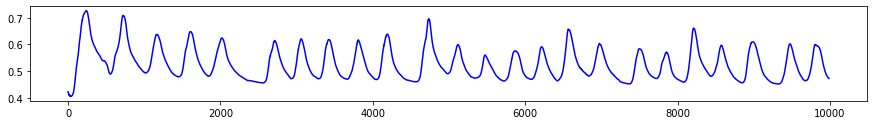

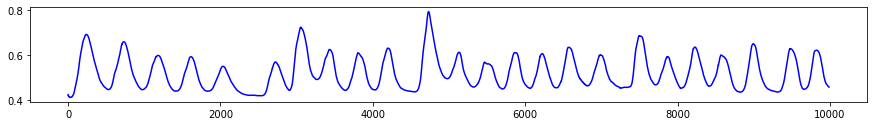

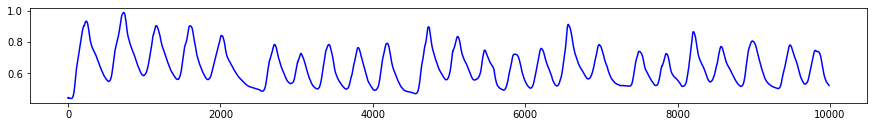

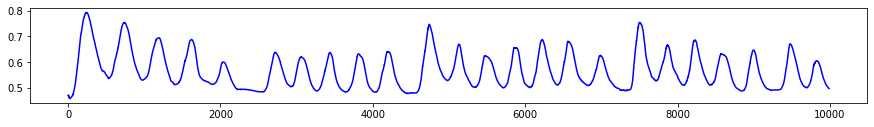

In [298]:
x = range(0, len(df))
fig = plt.figure(figsize = (15, 8))
plt.subplot(4,1,1)
plt.plot(x, df['1'], 'b')
plt.show()

fig = plt.figure(figsize = (15, 8))
plt.subplot(4,1,2)
plt.plot(x, df['2'], 'b')
plt.show()

fig = plt.figure(figsize = (15, 8))
plt.subplot(4,1,3)
plt.plot(x, df['3'], 'b')
plt.show()

fig = plt.figure(figsize = (15, 8))
plt.subplot(4,1,4)
plt.plot(x, df['4'], 'b')
plt.show()

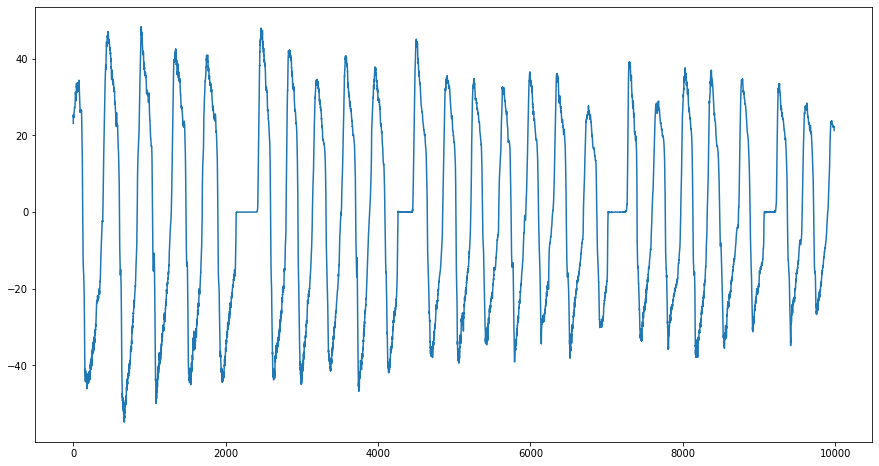

In [299]:
fig = plt.figure(figsize = (15, 8))
plt.plot(flow['Flow'])

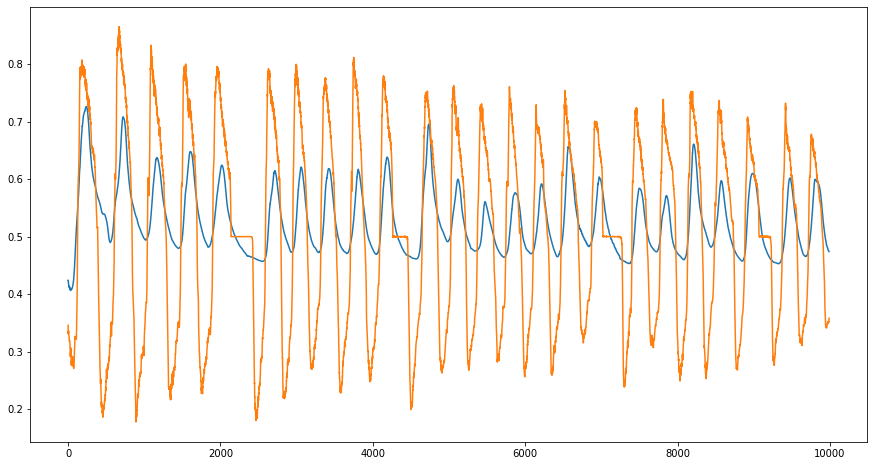

In [300]:
flow['a'] = (flow['Flow'] / 150) - 0.5
fig = plt.figure(figsize = (15, 8))
plt.plot(x, df['1'], x, flow['a']*-1)

In [301]:
flow.drop('a', inplace = True, axis = 1)

In [302]:
def label_fix(label):
    if label < -22:
        return 0
    elif label > 22:
        return 1
    else:
        return 2

df['Class'] = flow['Flow'].apply(label_fix)

In [303]:
df.head()

,1,2,3,4,d1,d2,d3,d4,hours,minutes,seconds,Class
0,0.424000,0.424000,0.440000,0.471111,0.000000,0.000000,0.000000,0.0,15.0,7.0,52.892885,1
1,0.424000,0.424000,0.444000,0.471111,0.000000,0.000000,0.194518,0.0,15.0,7.0,52.903167,1
2,0.421333,0.421333,0.442660,0.471111,-0.082280,-0.082280,0.060905,0.0,15.0,7.0,52.913970,1
3,0.419992,0.419992,0.441990,0.471111,-0.094907,-0.094907,0.016135,0.0,15.0,7.0,52.924747,1
4,0.419186,0.417572,0.441589,0.471111,-0.091715,-0.130750,-0.000505,0.0,15.0,7.0,52.934627,1


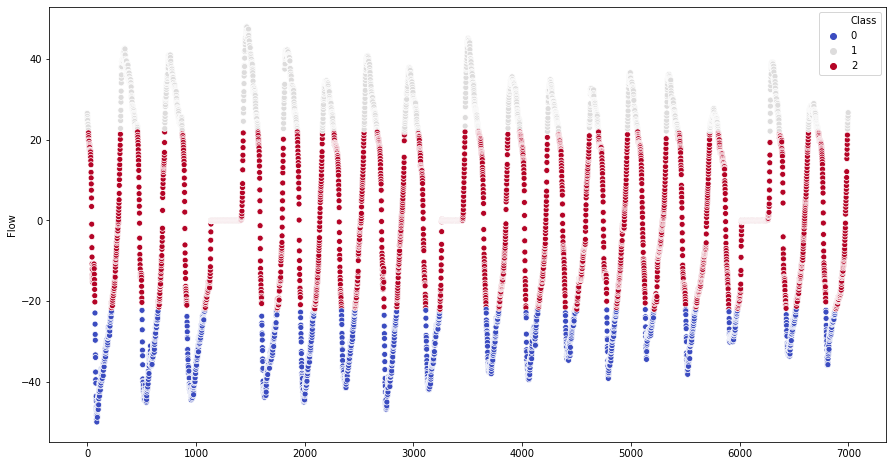

In [304]:
fig = plt.figure(figsize = (15, 8))
sns.scatterplot(y = flow['Flow'][1000:8000], x = range(0, 7000), hue = df['Class'][1000:8000], palette = 'coolwarm')

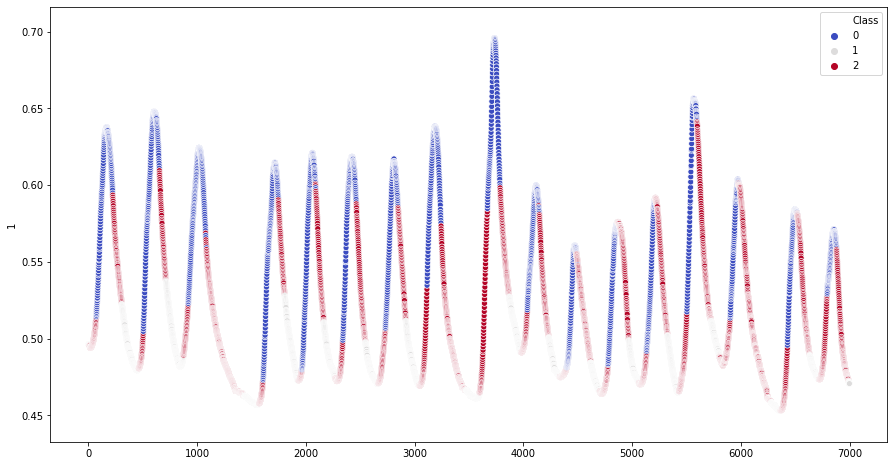

In [305]:
fig = plt.figure(figsize = (15, 8))
sns.scatterplot(y = df['1'][1000:8000], x = range(0, 7000), hue = df['Class'][1000:8000], palette = 'coolwarm')

In [306]:
df.head()

,1,2,3,4,d1,d2,d3,d4,hours,minutes,seconds,Class
0,0.424000,0.424000,0.440000,0.471111,0.000000,0.000000,0.000000,0.0,15.0,7.0,52.892885,1
1,0.424000,0.424000,0.444000,0.471111,0.000000,0.000000,0.194518,0.0,15.0,7.0,52.903167,1
2,0.421333,0.421333,0.442660,0.471111,-0.082280,-0.082280,0.060905,0.0,15.0,7.0,52.913970,1
3,0.419992,0.419992,0.441990,0.471111,-0.094907,-0.094907,0.016135,0.0,15.0,7.0,52.924747,1
4,0.419186,0.417572,0.441589,0.471111,-0.091715,-0.130750,-0.000505,0.0,15.0,7.0,52.934627,1


In [307]:
# Create the data matrix
X = df.drop('Class', axis = 1)
X.drop('hours', inplace = True, axis = 1)
X.drop('minutes', inplace = True, axis = 1)
X.drop('seconds', inplace = True, axis = 1)

# Create the classification matrix
y = df['Class']
y = pd.DataFrame(y, index = None, columns = ['Class'])

# Perform train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)
y_test.reset_index(inplace = True, drop = True)
y_train.reset_index(inplace = True, drop = True)

In [308]:
# Develop keras sequential model with optimized parameters through grid search cv
model = keras.Sequential()
model.add(keras.layers.Dense(150, activation = tf.nn.relu, input_dim = 8))
model.add(keras.layers.Dropout(0.3))
#model.add(keras.layers.Dense(125, activation = tf.nn.relu))
#model.add(keras.layers.Dropout(0.3))
model.add(keras.layers.Dense(100, activation = tf.nn.relu))
model.add(keras.layers.Dropout(0.3))
model.add(keras.layers.Dense(50, activation = tf.nn.relu))
model.add(keras.layers.Dropout(0.4))
model.add(keras.layers.Dense(3, activation = tf.nn.softmax))

model.compile(optimizer = 'adam',
              loss = 'sparse_categorical_crossentropy',
              metrics = ['accuracy'])
model.summary()

Model: "sequential_10"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_41 (Dense)             (None, 150)               1350      
_________________________________________________________________
dropout_31 (Dropout)         (None, 150)               0         
_________________________________________________________________
dense_42 (Dense)             (None, 125)               18875     
_________________________________________________________________
dropout_32 (Dropout)         (None, 125)               0         
_________________________________________________________________
dense_43 (Dense)             (None, 100)               12600     
_________________________________________________________________
dropout_33 (Dropout)         (None, 100)               0         
_________________________________________________________________
dense_44 (Dense)             (None, 50)              

In [309]:
EPOCHS = 500
model.fit(X_train, y_train, epochs = EPOCHS)

Epoch 1/500
6992/6992 [==============================] - 0s 60us/sample - loss: 0.8809 - acc: 0.5579
Epoch 2/500
6992/6992 [==============================] - 0s 35us/sample - loss: 0.6449 - acc: 0.6586
Epoch 3/500
6992/6992 [==============================] - 0s 34us/sample - loss: 0.5742 - acc: 0.7161
Epoch 4/500
6992/6992 [==============================] - 0s 34us/sample - loss: 0.5527 - acc: 0.7360
Epoch 5/500
6992/6992 [==============================] - 0s 33us/sample - loss: 0.5326 - acc: 0.7487
Epoch 6/500
6992/6992 [==============================] - 0s 34us/sample - loss: 0.5135 - acc: 0.7559
Epoch 7/500
6992/6992 [==============================] - 0s 34us/sample - loss: 0.5120 - acc: 0.7597
Epoch 8/500
6992/6992 [==============================] - 0s 33us/sample - loss: 0.5025 - acc: 0.7676
Epoch 9/500
6992/6992 [==============================] - 0s 33us/sample - loss: 0.5154 - acc: 0.7603
Epoch 10/500
6992/6992 [==============================] - 0s 34us/sample - loss: 0.4986 - a

6992/6992 [==============================] - 0s 37us/sample - loss: 0.4104 - acc: 0.7939
Epoch 82/500
6992/6992 [==============================] - 0s 42us/sample - loss: 0.4157 - acc: 0.7993
Epoch 83/500
6992/6992 [==============================] - 0s 39us/sample - loss: 0.4123 - acc: 0.7972
Epoch 84/500
6992/6992 [==============================] - 0s 40us/sample - loss: 0.4102 - acc: 0.7998
Epoch 85/500
6992/6992 [==============================] - 0s 34us/sample - loss: 0.4029 - acc: 0.8108
Epoch 86/500
6992/6992 [==============================] - 0s 39us/sample - loss: 0.4009 - acc: 0.8031
Epoch 87/500
6992/6992 [==============================] - 0s 38us/sample - loss: 0.4092 - acc: 0.8039
Epoch 88/500
6992/6992 [==============================] - 0s 37us/sample - loss: 0.4001 - acc: 0.8068
Epoch 89/500
6992/6992 [==============================] - 0s 40us/sample - loss: 0.3877 - acc: 0.8131
Epoch 90/500
6992/6992 [==============================] - 0s 35us/sample - loss: 0.3943 - acc: 

6992/6992 [==============================] - 0s 34us/sample - loss: 0.3687 - acc: 0.8232
Epoch 161/500
6992/6992 [==============================] - 0s 33us/sample - loss: 0.3600 - acc: 0.8318
Epoch 162/500
6992/6992 [==============================] - 0s 33us/sample - loss: 0.3693 - acc: 0.8258
Epoch 163/500
6992/6992 [==============================] - 0s 33us/sample - loss: 0.3746 - acc: 0.8225
Epoch 164/500
6992/6992 [==============================] - 0s 33us/sample - loss: 0.3692 - acc: 0.8267
Epoch 165/500
6992/6992 [==============================] - 0s 35us/sample - loss: 0.3686 - acc: 0.8188
Epoch 166/500
6992/6992 [==============================] - 0s 33us/sample - loss: 0.3690 - acc: 0.8202
Epoch 167/500
6992/6992 [==============================] - 0s 33us/sample - loss: 0.3652 - acc: 0.8249
Epoch 168/500
6992/6992 [==============================] - 0s 33us/sample - loss: 0.3670 - acc: 0.8262
Epoch 169/500
6992/6992 [==============================] - 0s 33us/sample - loss: 0.367

6992/6992 [==============================] - 0s 34us/sample - loss: 0.3377 - acc: 0.8418
Epoch 240/500
6992/6992 [==============================] - 0s 34us/sample - loss: 0.3416 - acc: 0.8377
Epoch 241/500
6992/6992 [==============================] - 0s 34us/sample - loss: 0.3259 - acc: 0.8467
Epoch 242/500
6992/6992 [==============================] - 0s 33us/sample - loss: 0.3365 - acc: 0.8464
Epoch 243/500
6992/6992 [==============================] - 0s 33us/sample - loss: 0.3352 - acc: 0.8471
Epoch 244/500
6992/6992 [==============================] - 0s 33us/sample - loss: 0.3425 - acc: 0.8377
Epoch 245/500
6992/6992 [==============================] - 0s 37us/sample - loss: 0.3329 - acc: 0.8447
Epoch 246/500
6992/6992 [==============================] - 0s 41us/sample - loss: 0.3407 - acc: 0.8401
Epoch 247/500
6992/6992 [==============================] - 0s 34us/sample - loss: 0.3461 - acc: 0.8372
Epoch 248/500
6992/6992 [==============================] - 0s 39us/sample - loss: 0.336

6992/6992 [==============================] - 0s 34us/sample - loss: 0.3274 - acc: 0.8474
Epoch 319/500
6992/6992 [==============================] - 0s 33us/sample - loss: 0.3177 - acc: 0.8523
Epoch 320/500
6992/6992 [==============================] - 0s 35us/sample - loss: 0.3202 - acc: 0.8465
Epoch 321/500
6992/6992 [==============================] - 0s 33us/sample - loss: 0.3184 - acc: 0.8501
Epoch 322/500
6992/6992 [==============================] - 0s 33us/sample - loss: 0.3137 - acc: 0.8548
Epoch 323/500
6992/6992 [==============================] - 0s 35us/sample - loss: 0.3268 - acc: 0.8491
Epoch 324/500
6992/6992 [==============================] - 0s 33us/sample - loss: 0.3221 - acc: 0.8473
Epoch 325/500
6992/6992 [==============================] - 0s 39us/sample - loss: 0.3150 - acc: 0.8540
Epoch 326/500
6992/6992 [==============================] - 0s 37us/sample - loss: 0.3210 - acc: 0.8540
Epoch 327/500
6992/6992 [==============================] - 0s 35us/sample - loss: 0.313

6992/6992 [==============================] - 0s 34us/sample - loss: 0.2981 - acc: 0.8593
Epoch 398/500
6992/6992 [==============================] - 0s 33us/sample - loss: 0.2960 - acc: 0.8653
Epoch 399/500
6992/6992 [==============================] - 0s 34us/sample - loss: 0.3148 - acc: 0.8594
Epoch 400/500
6992/6992 [==============================] - 0s 34us/sample - loss: 0.3044 - acc: 0.8573
Epoch 401/500
6992/6992 [==============================] - 0s 33us/sample - loss: 0.3134 - acc: 0.8601
Epoch 402/500
6992/6992 [==============================] - 0s 33us/sample - loss: 0.3153 - acc: 0.8567
Epoch 403/500
6992/6992 [==============================] - 0s 34us/sample - loss: 0.3304 - acc: 0.8430
Epoch 404/500
6992/6992 [==============================] - 0s 34us/sample - loss: 0.2998 - acc: 0.8643
Epoch 405/500
6992/6992 [==============================] - 0s 34us/sample - loss: 0.2975 - acc: 0.8658
Epoch 406/500
6992/6992 [==============================] - 0s 33us/sample - loss: 0.309

6992/6992 [==============================] - 0s 34us/sample - loss: 0.3037 - acc: 0.8608
Epoch 477/500
6992/6992 [==============================] - 0s 33us/sample - loss: 0.2912 - acc: 0.8689
Epoch 478/500
6992/6992 [==============================] - 0s 33us/sample - loss: 0.2867 - acc: 0.8733
Epoch 479/500
6992/6992 [==============================] - 0s 34us/sample - loss: 0.2946 - acc: 0.8671
Epoch 480/500
6992/6992 [==============================] - 0s 34us/sample - loss: 0.3009 - acc: 0.8650
Epoch 481/500
6992/6992 [==============================] - 0s 33us/sample - loss: 0.2955 - acc: 0.8674
Epoch 482/500
6992/6992 [==============================] - 0s 33us/sample - loss: 0.3001 - acc: 0.8658
Epoch 483/500
6992/6992 [==============================] - 0s 33us/sample - loss: 0.2886 - acc: 0.8717
Epoch 484/500
6992/6992 [==============================] - 0s 34us/sample - loss: 0.2936 - acc: 0.8674
Epoch 485/500
6992/6992 [==============================] - 0s 34us/sample - loss: 0.290

In [310]:
# Scoring the model on testing data from same dataset
test_loss, test_acc = model.evaluate(X_test, y_test)
print('Test accuracy:', test_acc)

predictions = model.predict(X_test)

final_pred = []
for score in range(0, len(predictions)):
    final_pred.append(np.argmax(predictions[score]))
    
print(classification_report(y_test, final_pred))

2997/2997 [==============================] - 0s 47us/sample - loss: 0.2495 - acc: 0.8939
Test accuracy: 0.8938939
              precision    recall  f1-score   support

           0       0.94      0.95      0.94       753
           1       0.89      0.81      0.85       803
           2       0.88      0.91      0.89      1441

    accuracy                           0.89      2997
   macro avg       0.90      0.89      0.89      2997
weighted avg       0.89      0.89      0.89      2997



In [311]:
print(confusion_matrix(y_test, final_pred))

[[ 715    0   38]
 [   0  654  149]
 [  48   83 1310]]


In [312]:
Predictions = classSwitch(final_pred)

In [313]:
Class = classSwitch(list(y_test['Class']))

In [314]:
print(classification_report(Class, Predictions))

              precision    recall  f1-score   support

           0       0.88      0.92      0.90      1485
           1       0.92      0.88      0.90      1511
           2       1.00      1.00      1.00         1

    accuracy                           0.90      2997
   macro avg       0.93      0.93      0.93      2997
weighted avg       0.90      0.90      0.90      2997



#### Testing Dataset

In [315]:
df_test = pd.read_csv('sensors_1.csv')
df_test.columns = ['1', '2', '3', '4', 'd1', 'd2', 'd3', 'd4', 'hours', 'minutes', 'seconds']

flow_test = pd.read_csv('Flow_1.csv')
flow_test.columns = ['Flow']

In [316]:
df_test['Class'] = flow_test['Flow'].apply(label_fix)

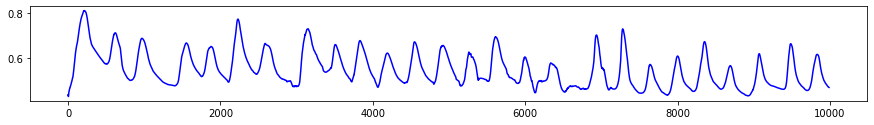

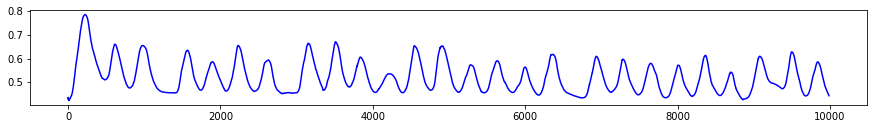

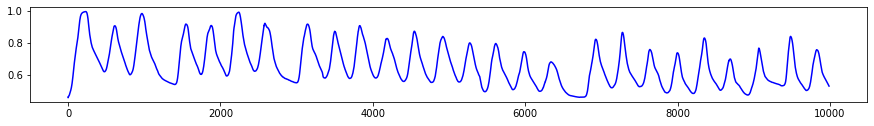

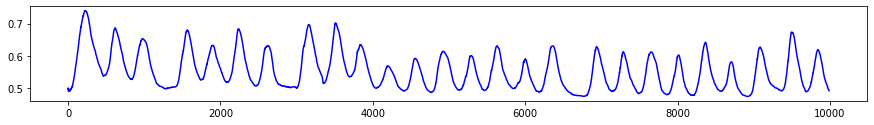

In [317]:
x = range(0, len(df_test))
fig = plt.figure(figsize = (15, 8))
plt.subplot(4,1,1)
plt.plot(x, df_test['1'], 'b')
plt.show()

fig = plt.figure(figsize = (15, 8))
plt.subplot(4,1,2)
plt.plot(x, df_test['2'], 'b')
plt.show()

fig = plt.figure(figsize = (15, 8))
plt.subplot(4,1,3)
plt.plot(x, df_test['3'], 'b')
plt.show()

fig = plt.figure(figsize = (15, 8))
plt.subplot(4,1,4)
plt.plot(x, df_test['4'], 'b')
plt.show()

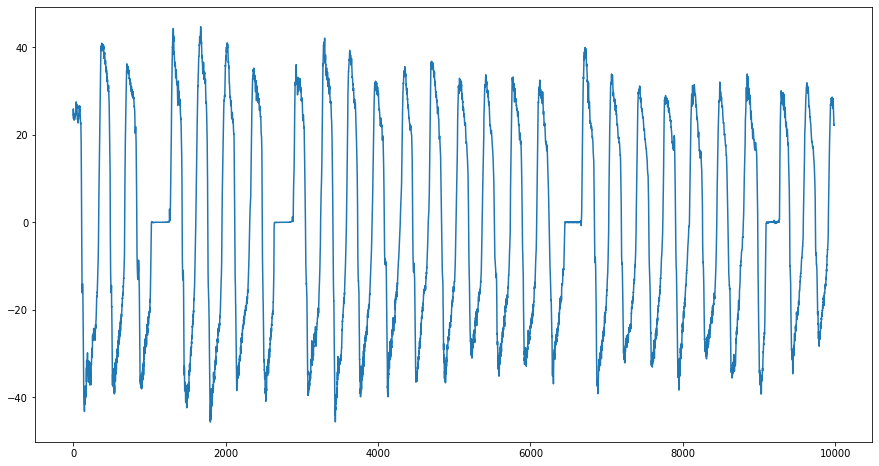

In [318]:
fig = plt.figure(figsize = (15, 8))
plt.plot(flow_test['Flow'])

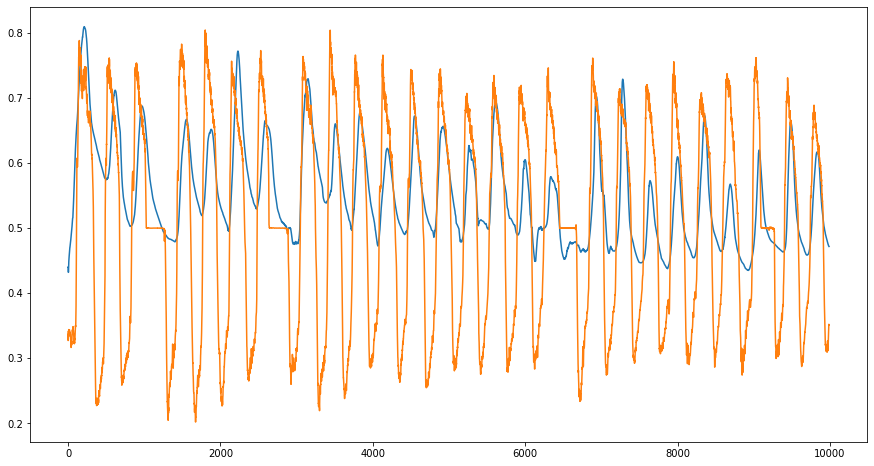

In [319]:
flow_test['a'] = (flow_test['Flow'] / 150) - 0.5
fig = plt.figure(figsize = (15, 8))
plt.plot(x, df_test['1'], x, flow_test['a']*-1)

In [320]:
flow_test.drop('a', inplace = True, axis = 1)

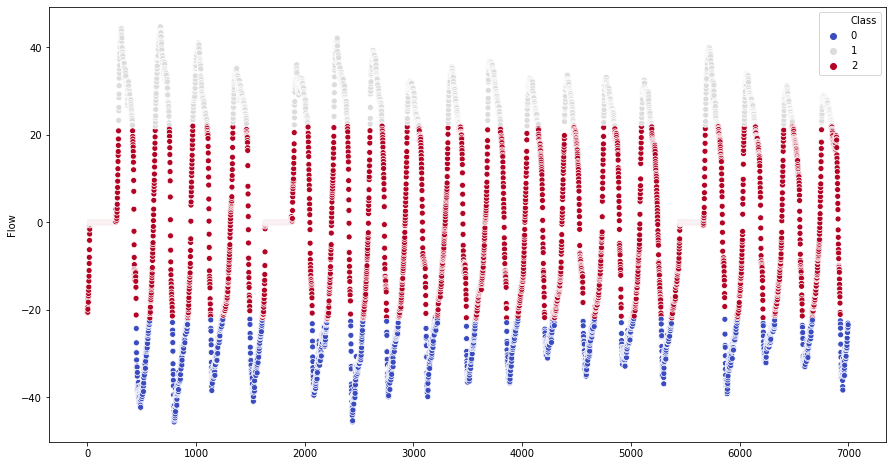

In [321]:
fig = plt.figure(figsize = (15, 8))
sns.scatterplot(y = flow_test['Flow'][1000:8000], x = range(0, 7000), hue = df_test['Class'][1000:8000], palette = 'coolwarm')

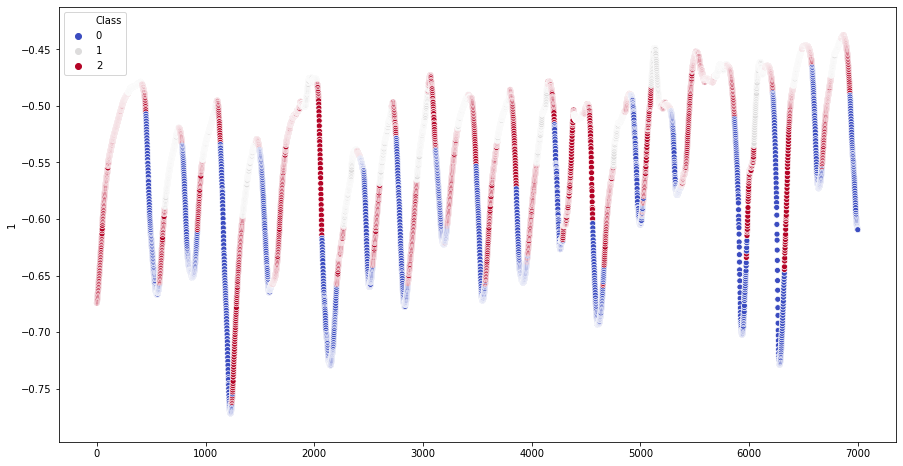

In [322]:
fig = plt.figure(figsize = (15, 8))
sns.scatterplot(y = df_test['1'][1000:8000]*-1, x = range(0, 7000), hue = df_test['Class'][1000:8000], palette = 'coolwarm')

In [323]:
test_sensors = df_test.drop('Class', axis = 1)
test_sensors.drop('hours', inplace = True, axis = 1)
test_sensors.drop('minutes', inplace = True, axis = 1)
test_sensors.drop('seconds', inplace = True, axis = 1)

# Create the classification matrix
test_class = df_test['Class']
test_class = pd.DataFrame(test_class, index = None, columns = ['Class'])

In [324]:
test_predictions = model.predict(test_sensors)

final_pred_test = []
for score in range(0, len(test_predictions)):
    final_pred_test.append(np.argmax(test_predictions[score]))
    
print(classification_report(test_class, final_pred_test))

              precision    recall  f1-score   support

           0       0.72      0.89      0.80      2709
           1       0.73      0.46      0.57      2786
           2       0.64      0.70      0.67      4494

    accuracy                           0.69      9989
   macro avg       0.70      0.68      0.68      9989
weighted avg       0.69      0.69      0.68      9989



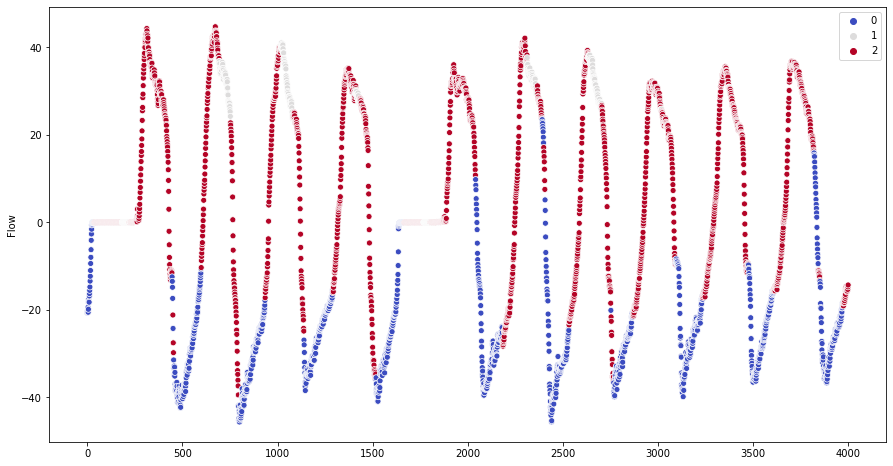

In [325]:
fig = plt.figure(figsize = (15, 8))
sns.scatterplot(y = flow_test['Flow'][1000:5000], x = range(0, 4000), hue = final_pred_test[1000:5000], palette = 'coolwarm')

In [326]:
testPredictions = classSwitch(final_pred_test)

In [327]:
testClass = classSwitch(list(test_class['Class']))

In [328]:
print(classification_report(testClass, testPredictions))

              precision    recall  f1-score   support

           0       0.80      0.86      0.83      5642
           1       0.80      0.72      0.76      4347
           2       0.00      0.00      0.00         0

    accuracy                           0.80      9989
   macro avg       0.53      0.53      0.53      9989
weighted avg       0.80      0.80      0.80      9989



/Users/mikefurr/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1439: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)


#### Save TFLite Model

In [329]:
#keras_file = "model_4.h5"

In [330]:
#keras.models.save_model(model, keras_file)

In [331]:
#converter = tf.lite.TocoConverter.from_keras_model_file('model_4.h5')

In [332]:
#tflite_model = converter.convert()

In [333]:
#open("model_4.tflite", "wb").write(tflite_model)